# Data augmentation

## Mirror data horizontally

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
np_loaded_data_file = '../data/train_data_cleaned.npz'
if not os.path.isfile(np_loaded_data_file):
    print "%s does not exist. See facial_recog_kaggle.ipynb" % np_loaded_data_file
else:
    print "loading %s" % np_loaded_data_file
    npzfile = np.load(np_loaded_data_file)
    print "loaded: ", npzfile.files
    X_train_clean_cv, y_train_clean_cv = npzfile['X_train_clean_cv'], npzfile['y_train_clean_cv']
    X_val_clean_cv, y_val_clean_cv = npzfile['X_val_clean_cv'], npzfile['y_val_clean_cv']
    feature_labels = npzfile['feature_labels']
    print X_train_clean_cv.shape, y_train_clean_cv.shape
    print X_val_clean_cv.shape, y_val_clean_cv.shape

num_train, num_labels = y_train_clean_cv.shape
num_val = y_val_clean_cv.shape[0]

loading ../data/train_data_cleaned.npz
loaded:  ['X_val_clean_cv', 'y_val_clean_cv', 'y_train_clean_cv', 'feature_labels', 'X_train_clean_cv']
(1628, 1, 96, 96) (1628, 30)
(512, 1, 96, 96) (512, 30)


In [16]:
def flip_labels(y_src, flip_indices_x, flip_indices_y):
    
    N = y_src.shape[0]
    y_dest = y_src.copy()
    
    for n in range(N):
        for i, j in flip_indices_x:
            y_dest[n, i] = 96 - y_src[n, j]
            y_dest[n, j] = 96 - y_src[n, i]
        
        for i, j in flip_indices_y:
            y_dest[n, i] = y_src[n, j]
            y_dest[n, j] = y_src[n, i]
    
    return y_dest

In [17]:
print zip(feature_labels, np.arange(feature_labels.shape[0]))

X_train_clean_cv_flipped = X_train_clean_cv[:,:,:,::-1]
X_val_clean_cv_flipped = X_val_clean_cv[:,:,:,::-1]

flip_indices_x = [
    (0, 2),
    (4, 8), (6, 10),
    (12, 16), (14, 18),
    (22, 24),
    (20, 20), (26, 26), (28, 28)
    ]
flip_indices_y = [
    (1, 3),
    (5, 9), (7, 11),
    (13, 17), (15, 19),
    (23, 25),
    (21, 21), (27, 27), (29, 29)
    ]

for i, j in flip_indices_x:
    print("{} -> {}".format(feature_labels[i], feature_labels[j]))

for i, j in flip_indices_y:
    print("{} -> {}".format(feature_labels[i], feature_labels[j]))


y_train_clean_cv_flipped = flip_labels(y_train_clean_cv, flip_indices_x, flip_indices_y)
y_val_clean_cv_flipped = flip_labels(y_val_clean_cv, flip_indices_x, flip_indices_y)


[('left_eye_center_x', 0), ('left_eye_center_y', 1), ('right_eye_center_x', 2), ('right_eye_center_y', 3), ('left_eye_inner_corner_x', 4), ('left_eye_inner_corner_y', 5), ('left_eye_outer_corner_x', 6), ('left_eye_outer_corner_y', 7), ('right_eye_inner_corner_x', 8), ('right_eye_inner_corner_y', 9), ('right_eye_outer_corner_x', 10), ('right_eye_outer_corner_y', 11), ('left_eyebrow_inner_end_x', 12), ('left_eyebrow_inner_end_y', 13), ('left_eyebrow_outer_end_x', 14), ('left_eyebrow_outer_end_y', 15), ('right_eyebrow_inner_end_x', 16), ('right_eyebrow_inner_end_y', 17), ('right_eyebrow_outer_end_x', 18), ('right_eyebrow_outer_end_y', 19), ('nose_tip_x', 20), ('nose_tip_y', 21), ('mouth_left_corner_x', 22), ('mouth_left_corner_y', 23), ('mouth_right_corner_x', 24), ('mouth_right_corner_y', 25), ('mouth_center_top_lip_x', 26), ('mouth_center_top_lip_y', 27), ('mouth_center_bottom_lip_x', 28), ('mouth_center_bottom_lip_y', 29), ('Image', 30)]
left_eye_center_x -> right_eye_center_x
left_eye

[[  24 1337 1555  557]
 [  29   45 1386  349]
 [1333  512  863  382]
 [1404 1134  535  528]]


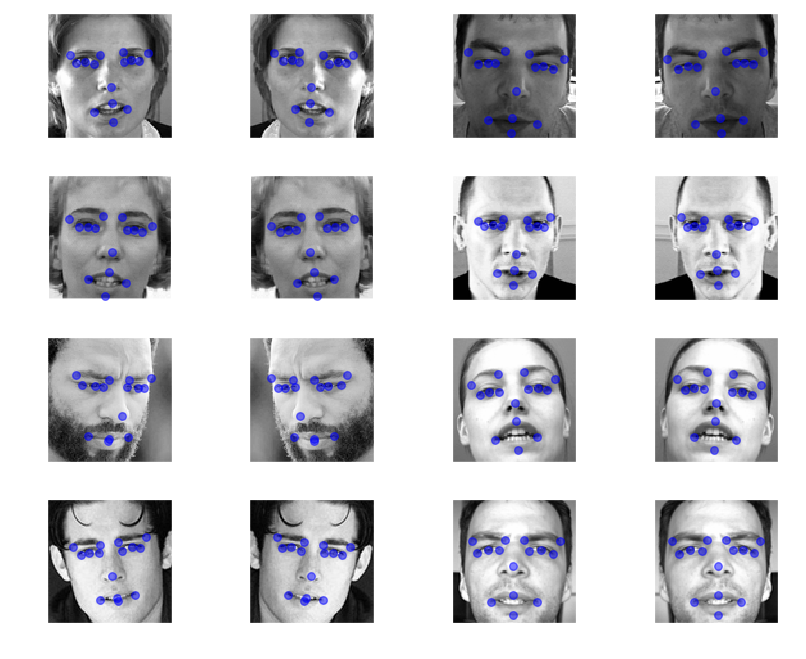

In [18]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Visualize
N_img_x = 4
N_img_y = 4
sel_idx = np.random.choice(X_train_clean_cv.shape[0], N_img_x * N_img_y, replace=False).reshape(N_img_x, N_img_y)
print sel_idx
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots


for n_y in range(N_img_y):
    n_x = 0
    while n_x < N_img_x:
        i = sel_idx[n_x][n_y]
        
        a = X_train_clean_cv[i].reshape(96, 96)
        b = y_train_clean_cv[i]
        b_x = b[0::2]
        b_y = b[1::2]
#         print b

        plt.subplot(N_img_x, N_img_y, n_y * N_img_x + n_x + 1)
        plt.imshow(a)
        plt.scatter(b_x, b_y, s=30, alpha=0.5, color='blue')
        plt.gca().axis('off')
        
        n_x += 1
        
        a = X_train_clean_cv_flipped[i].reshape(96, 96)
        b = y_train_clean_cv_flipped[i]
        b_x = b[0::2]
        b_y = b[1::2]
#         print b
        

        plt.subplot(N_img_x, N_img_y, n_y * N_img_x + n_x + 1)
        plt.imshow(a)
        plt.scatter(b_x, b_y, s=30, alpha=0.5, color='blue')
        plt.gca().axis('off')
        
        n_x += 1
        

plt.show()

In [ ]:
X_train_clean_cv = np.append(X_train_clean_cv, X_train_clean_cv_flipped, axis=0)
X_val_clean_cv = np.append(X_val_clean_cv, X_val_clean_cv_flipped, axis=0)

y_train_clean_cv = np.append(y_train_clean_cv, y_train_clean_cv_flipped, axis=0)
y_val_clean_cv = np.append(y_val_clean_cv, y_val_clean_cv_flipped, axis=0)

In [21]:
X_train_clean = np.append(X_train_clean_cv, X_val_clean_cv, axis=0)
y_train_clean = np.append(y_train_clean_cv, y_val_clean_cv, axis=0)

num_images = X_train_clean.shape[0]
typical_batch_size = 64
num_val = int(np.ceil( (0.20 * num_images)// typical_batch_size) * typical_batch_size )


num_train = num_images - num_val
print "num_images = %d, num_val = %d, num_train = %d ", (num_images, num_val, num_train)

num_images = %d, num_val = %d, num_train = %d  (4280, 832, 3448)


In [23]:
rand_idx = np.random.choice(num_images, num_images, replace=False)
X_train_clean_cv = X_train_clean[rand_idx[:num_train]] 
y_train_clean_cv = y_train_clean[rand_idx[:num_train]]

X_val_clean_cv = X_train_clean[rand_idx[num_train:]] 
y_val_clean_cv = y_train_clean[rand_idx[num_train:]]

print X_train_clean_cv.shape
print X_val_clean_cv.shape

np_loaded_data_file = "../data/train_data_cleaned_data_aug_flip.npz"
np.savez(np_loaded_data_file, 
         X_train_clean_cv=X_train_clean_cv, y_train_clean_cv=y_train_clean_cv, 
         X_val_clean_cv=X_val_clean_cv, y_val_clean_cv=y_val_clean_cv,
         feature_labels=feature_labels)

(3448, 1, 96, 96)
(832, 1, 96, 96)
